I will try to predict house prices using a Sequential Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading in the data
df = pd.read_csv('kc_house_data.csv')

In [6]:
# Checking for any missing values --> there are none!
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# Getting an idea of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [9]:
# We can see those categorical variables as well, such as 'bedrooms' and 'waterfront'
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


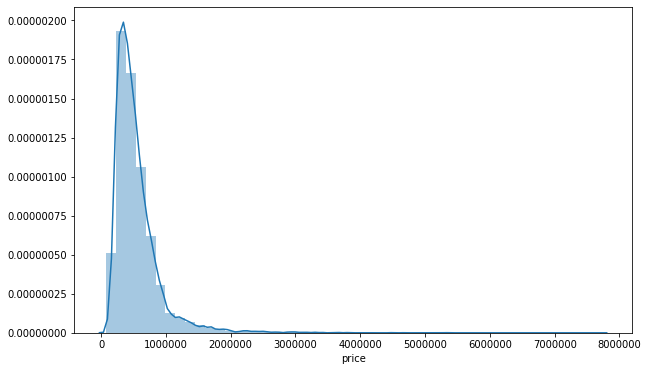

In [10]:
# Plotting the housing prices to see its distribution
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

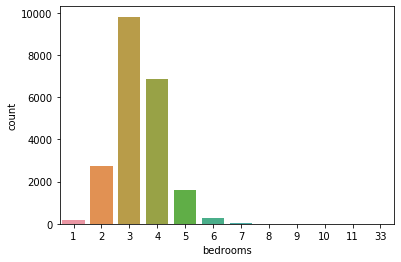

In [11]:
# Plotting the amount of bedrooms to see its distribution
sns.countplot(df['bedrooms'])

In [13]:
# Looking at the correlations that the variables have with 'price'. There are some very high correlations but also
    # some almost negligible correlations
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

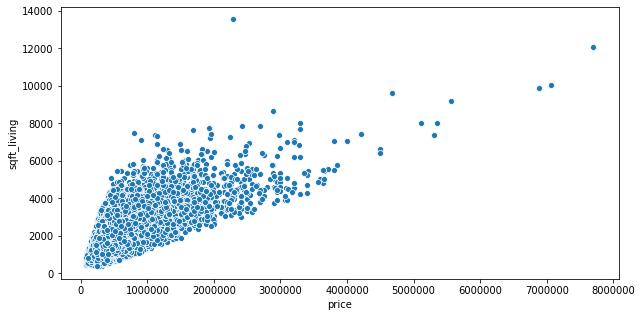

In [14]:
# Plotting 'sqft_living' against 'price'. It is clear that there are some outliers
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'price', y='sqft_living', data=df)

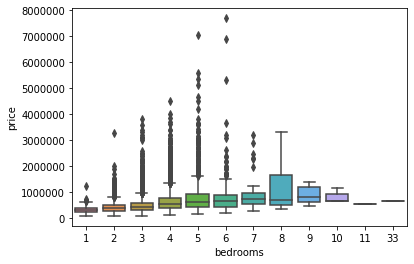

In [16]:
# here too we see outliers in amount of bedrooms. Clearly there are a few very big and expensive houses in the data
sns.boxplot(x='bedrooms', y='price', data=df)

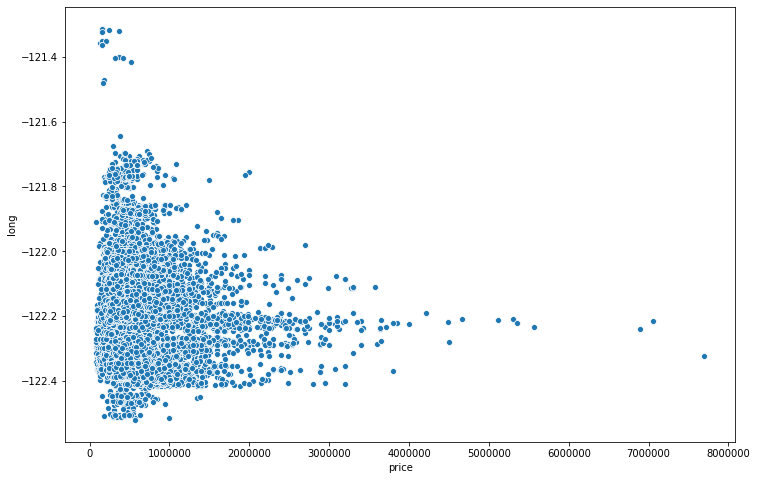

In [18]:
# Plotting the longitude against price shows some interesting relations:
    # The majority of houses are similarly priced and have a similair longitude
    # Some houses are very expensive
    # Some cheaper houses seem to be on a different longitude
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long', data=df)

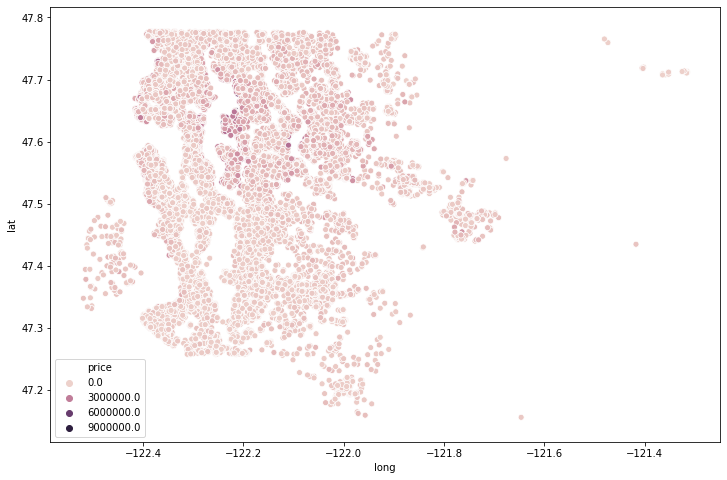

In [19]:
# Plotting the longitude and latitude shows us something which very much looks like a geographical map (not strange)
# Grouping on price shows that there are some more expensive- and some cheaper neighbourhoods
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df, hue='price')

In [21]:
# Sorting the housing prices shows some extreme outliers. This is not great as they will impact the model while
    # being too few to accurately make a prediction about houses of that caliber. These should be removed, however
    # by doing do the model may no longer be used to predict houses of that caliber
df.sort_values('price', ascending=False).head(50)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [22]:
# Taking the bottom 99% of houses and thus removing the outliers
bottom_99_perc = df.sort_values('price', ascending=False).iloc[216:]

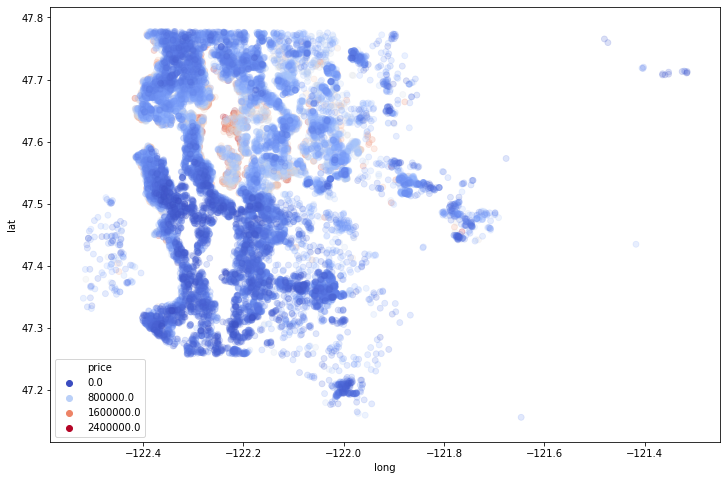

In [23]:
# plotting these houses again shows the nice geographical map
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat',data=bottom_99_perc, edgecolor=None, alpha=.2, palette='coolwarm', hue='price')

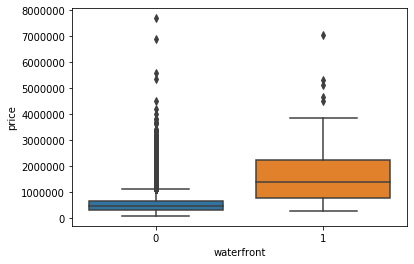

In [24]:
# Seems like waterfront has an effect on the price
sns.boxplot(x='waterfront',y='price',data=df)

In [25]:
# id has no predictive value
df = df.drop('id',axis=1)

In [30]:
# changing the date variables to actual dataformat and using that to engineer multiple new features
    # this because housing prices can go up over time, and therefore time should be used as a predictive variable
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.month)
df['month'] = df['date'].apply(lambda date: date.month)

In [31]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2


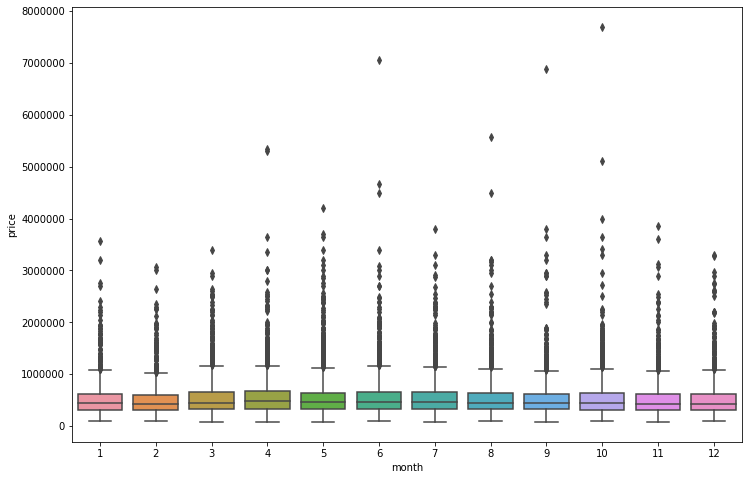

In [34]:
# Here we see little difference between the months. This suggests that it doesnt matter much at what month a house
    # is sold. However, the scale used for price is quite big (ranging from 1 million to 8 million), so maybe
    # on this graph its just hard to observe an effect
plt.figure(figsize=(12,8))
sns.boxplot(x='month', y='price', data=df)

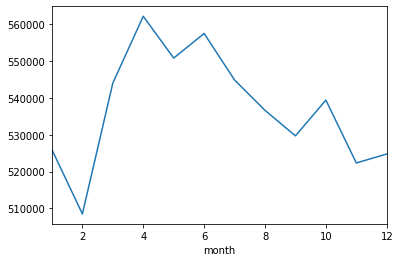

In [36]:
# With a smaller scale we can actually see a difference in months. April seems like a good month for selling
    # while february seems like a good month for buying
df.groupby('month').mean()['price'].plot()

In [38]:
# Dropping the original 'date' variable as we now have the engineered 'month' and 'year' variables
df = df.drop('date', axis=1)
df.head()

KeyError: "['date'] not found in axis"

In [39]:
# dropping zipcode as its not a numerical variable and otherwise that would be an amazing amount of dummies
    # all with little predictive ability
df = df.drop('zipcode', axis=1)

In [252]:
# Taking a look at  the 'yrs_renovated'
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [40]:
# many houses were renovated in year 0?? those may be missing values!
df.groupby('year')['yr_renovated'].value_counts()

year  yr_renovated
1     0               942
      1984              3
      2003              3
      2005              3
      2014              3
                     ... 
12    1999              1
      2000              1
      2002              1
      2011              1
      2013              1
Name: yr_renovated, Length: 441, dtype: int64

In [42]:
# dropping houses with prices over 2 million
# dropping 'sqft_above' and the engineered date variables
dropped_values = df[df['price']>2000000].index
df.drop(dropped_values, inplace=True)
df.drop(['sqft_above','year','month'], axis=1, inplace=True)
df[df['price']<2000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,47.5345,-122.069,1410,1287


In [43]:
# declaring the independent and dependent variables
X = df.drop('price', axis=1).values

y = df['price'].values

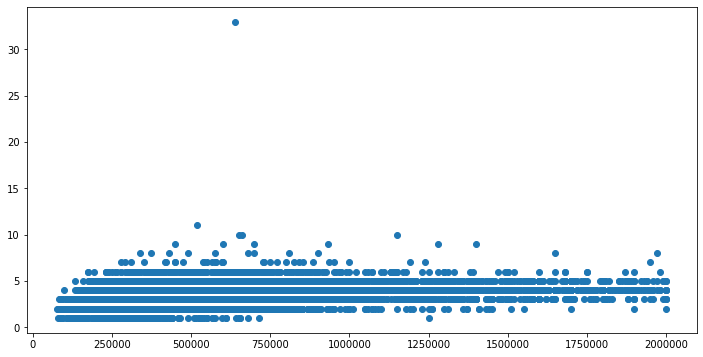

In [44]:
# We can see one house with an amazing amount of bedrooms
plt.figure(figsize=(12,6))
plt.scatter('price', 'bedrooms', data=df)

In [46]:
# off to the cross validation to avoid data leakage
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
# Scaling the data to ensure fair weights
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
# Checking the shape of the data before creating the model and deciding on the amount of neurons and hidden layers
X_train.shape

(14979, 16)

In [52]:
# The last layer also has the 'relu' activation function as this model predicts a linear variable (house price)
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss='mse')

In [54]:
model.fit(x=X_train, y=y_train,validation_data=(X_test, y_test), batch_size=128, epochs=600)

Train on 14979 samples, validate on 6420 samples
Epoch 1/600
14979/14979 [==============================] - 0s 29us/sample - loss: 350611788664.4374 - val_loss: 358294640100.2467
Epoch 2/600
14979/14979 [==============================] - 0s 13us/sample - loss: 349786277237.8738 - val_loss: 355143874464.2991
Epoch 3/600
14979/14979 [==============================] - 0s 13us/sample - loss: 336777230327.6598 - val_loss: 323636513527.2274
Epoch 4/600
14979/14979 [==============================] - 0s 13us/sample - loss: 269658757591.2902 - val_loss: 209440394158.9732
Epoch 5/600
14979/14979 [==============================] - 0s 12us/sample - loss: 132632163775.9786 - val_loss: 74546863632.9072
Epoch 6/600
14979/14979 [==============================] - 0s 13us/sample - loss: 57406344602.1059 - val_loss: 52475456395.2449
Epoch 7/600
14979/14979 [==============================] - ETA: 0s - loss: 51234261736.727 - 0s 12us/sample - loss: 51906922122.5364 - val_loss: 51499674451.1003
Epoch 8/600


Epoch 64/600
14979/14979 [==============================] - 0s 14us/sample - loss: 23653058934.2156 - val_loss: 23421269853.9464
Epoch 65/600
14979/14979 [==============================] - 0s 13us/sample - loss: 23582680127.3719 - val_loss: 23367946224.6879
Epoch 66/600
14979/14979 [==============================] - 0s 12us/sample - loss: 23548182028.1343 - val_loss: 23299605505.9140
Epoch 67/600
14979/14979 [==============================] - 0s 13us/sample - loss: 23535884311.9268 - val_loss: 23254117294.9732
Epoch 68/600
14979/14979 [==============================] - 0s 13us/sample - loss: 23445834973.1523 - val_loss: 23202402081.9738
Epoch 69/600
14979/14979 [==============================] - 0s 13us/sample - loss: 23403580016.3877 - val_loss: 23155528736.5383
Epoch 70/600
14979/14979 [==============================] - 0s 12us/sample - loss: 23326751814.2082 - val_loss: 23218771777.8741
Epoch 71/600
14979/14979 [==============================] - 0s 13us/sample - loss: 23339386192.90

14979/14979 [==============================] - 0s 13us/sample - loss: 22157318272.3162 - val_loss: 21867366883.6087
Epoch 128/600
14979/14979 [==============================] - 0s 13us/sample - loss: 22102876789.8909 - val_loss: 21862228524.3414
Epoch 129/600
14979/14979 [==============================] - 0s 13us/sample - loss: 22096434870.6301 - val_loss: 21885918715.2150
Epoch 130/600
14979/14979 [==============================] - 0s 12us/sample - loss: 22163539087.6635 - val_loss: 21883416861.8268
Epoch 131/600
14979/14979 [==============================] - 0s 13us/sample - loss: 22065762540.1236 - val_loss: 21943120892.8100
Epoch 132/600
14979/14979 [==============================] - 0s 12us/sample - loss: 22085703210.7265 - val_loss: 21873099545.6798
Epoch 133/600
14979/14979 [==============================] - 0s 12us/sample - loss: 22079989032.4534 - val_loss: 21850021227.0255
Epoch 134/600
14979/14979 [==============================] - 0s 13us/sample - loss: 22078792507.9367 - v

14979/14979 [==============================] - 0s 12us/sample - loss: 21796537748.1071 - val_loss: 21560669527.8854
Epoch 190/600
14979/14979 [==============================] - 0s 12us/sample - loss: 21796237927.4664 - val_loss: 21552157303.6262
Epoch 191/600
14979/14979 [==============================] - 0s 12us/sample - loss: 21800630295.2774 - val_loss: 21551028836.4860
Epoch 192/600
14979/14979 [==============================] - 0s 12us/sample - loss: 21797037208.6532 - val_loss: 21555682006.0511
Epoch 193/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21845685850.7254 - val_loss: 21551354642.0237
Epoch 194/600
14979/14979 [==============================] - 0s 12us/sample - loss: 21802532044.8820 - val_loss: 21578399724.8598
Epoch 195/600
14979/14979 [==============================] - 0s 12us/sample - loss: 21807418995.2248 - val_loss: 21539130063.6710
Epoch 196/600
14979/14979 [==============================] - 0s 12us/sample - loss: 21794788447.0921 - v

Epoch 252/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21632923764.3613 - val_loss: 21408937903.6112
Epoch 253/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21620857290.1646 - val_loss: 21398106395.2748
Epoch 254/600
14979/14979 [==============================] - 0s 12us/sample - loss: 21613596780.9141 - val_loss: 21400103986.4025
Epoch 255/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21642624088.0166 - val_loss: 21391490740.2368
Epoch 256/600
14979/14979 [==============================] - 0s 12us/sample - loss: 21622319772.2935 - val_loss: 21427000989.2685
Epoch 257/600
14979/14979 [==============================] - 0s 12us/sample - loss: 21616981750.1387 - val_loss: 21405785502.0660
Epoch 258/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21610693180.2614 - val_loss: 21436536798.8237
Epoch 259/600
14979/14979 [==============================] - 0s 13us/sample - loss: 216111

Epoch 314/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21463180081.0671 - val_loss: 21308084060.6704
Epoch 315/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21453854510.2984 - val_loss: 21298705791.4417
Epoch 316/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21450114640.6334 - val_loss: 21291274199.1676
Epoch 317/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21454379783.5028 - val_loss: 21319730337.4156
Epoch 318/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21456560725.6068 - val_loss: 21282891587.1502
Epoch 319/600
14979/14979 [==============================] - 0s 12us/sample - loss: 21459142248.6970 - val_loss: 21289152773.5826
Epoch 320/600
14979/14979 [==============================] - 0s 12us/sample - loss: 21447015786.6795 - val_loss: 21380689430.0112
Epoch 321/600
14979/14979 [==============================] - 0s 12us/sample - loss: 214470

Epoch 377/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21258817081.0399 - val_loss: 21140300897.6150
Epoch 378/600
14979/14979 [==============================] - ETA: 0s - loss: 20954729079.069 - 0s 12us/sample - loss: 21255605357.8071 - val_loss: 21113622960.5682
Epoch 379/600
14979/14979 [==============================] - 0s 12us/sample - loss: 21290894145.6792 - val_loss: 21128515392.5981
Epoch 380/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21243721252.8815 - val_loss: 21255672928.3389
Epoch 381/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21254035557.5010 - val_loss: 21108874388.6555
Epoch 382/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21242868956.5285 - val_loss: 21103743150.8137
Epoch 383/600
14979/14979 [==============================] - 0s 13us/sample - loss: 21241665060.6081 - val_loss: 21098199344.9670
Epoch 384/600
14979/14979 [=============================

Epoch 440/600
14979/14979 [==============================] - 0s 13us/sample - loss: 20914556087.9973 - val_loss: 20875792077.7570
Epoch 441/600
14979/14979 [==============================] - 0s 13us/sample - loss: 20917925555.4854 - val_loss: 20912332868.9047
Epoch 442/600
14979/14979 [==============================] - 0s 12us/sample - loss: 20954999719.0606 - val_loss: 20840726804.8947
Epoch 443/600
14979/14979 [==============================] - 0s 12us/sample - loss: 20915650532.8260 - val_loss: 20851462767.9701
Epoch 444/600
14979/14979 [==============================] - 0s 12us/sample - loss: 20896991991.7794 - val_loss: 20833207453.5875
Epoch 445/600
14979/14979 [==============================] - 0s 12us/sample - loss: 20898996645.4028 - val_loss: 20830627201.9938
Epoch 446/600
14979/14979 [==============================] - 0s 12us/sample - loss: 20867396312.8455 - val_loss: 20834547176.0748
Epoch 447/600
14979/14979 [==============================] - 0s 12us/sample - loss: 208867

14979/14979 [==============================] - 0s 12us/sample - loss: 20372786641.7358 - val_loss: 20383515860.4561
Epoch 504/600
14979/14979 [==============================] - 0s 13us/sample - loss: 20366533515.2712 - val_loss: 20473927480.9421
Epoch 505/600
14979/14979 [==============================] - 0s 12us/sample - loss: 20379507396.4393 - val_loss: 20372841287.6162
Epoch 506/600
14979/14979 [==============================] - 0s 13us/sample - loss: 20343637634.4012 - val_loss: 20427573962.5670
Epoch 507/600
14979/14979 [==============================] - 0s 13us/sample - loss: 20336898434.0081 - val_loss: 20362636403.4791
Epoch 508/600
14979/14979 [==============================] - 0s 12us/sample - loss: 20349323750.8085 - val_loss: 20374937573.2037
Epoch 509/600
14979/14979 [==============================] - 0s 12us/sample - loss: 20327670222.1296 - val_loss: 20361624766.7639
Epoch 510/600
14979/14979 [==============================] - 0s 13us/sample - loss: 20357304662.7177 - v

14979/14979 [==============================] - 0s 12us/sample - loss: 19854582173.1138 - val_loss: 19957532033.9938
Epoch 566/600
14979/14979 [==============================] - 0s 12us/sample - loss: 19843273848.3861 - val_loss: 19955290959.2723
Epoch 567/600
14979/14979 [==============================] - 0s 13us/sample - loss: 19899543532.9953 - val_loss: 19973113007.4517
Epoch 568/600
14979/14979 [==============================] - 0s 12us/sample - loss: 19841915513.9927 - val_loss: 19947674060.6405
Epoch 569/600
14979/14979 [==============================] - 0s 12us/sample - loss: 19820291237.3002 - val_loss: 19942023180.7601
Epoch 570/600
14979/14979 [==============================] - 0s 12us/sample - loss: 19819604491.7925 - val_loss: 19968450309.9016
Epoch 571/600
14979/14979 [==============================] - 0s 13us/sample - loss: 19806112893.4450 - val_loss: 19912240753.8841
Epoch 572/600
14979/14979 [==============================] - 0s 12us/sample - loss: 19817615539.5880 - v

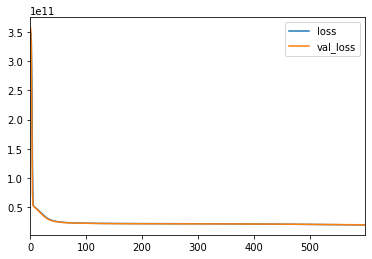

In [55]:
# checking for overfitting. If val_loss goes up we have overfitting
losses = pd.DataFrame(model.history.history)
losses.plot()

In [56]:
# using error to evaluate the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [57]:
predictions = model.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(y_test,predictions))

140585.9363931599

In [61]:
# on average the model predictions are 100k dollars off the actual prices. That is... a bit much
    # Considering the subject (prices) and the amount 100k it may be best not to use this model for financial decisions
mean_absolute_error(y_test, predictions)

95183.9234387169

In [62]:
# 75% of the variance was explained
explained_variance_score(y_test,predictions)

0.7662764998039229

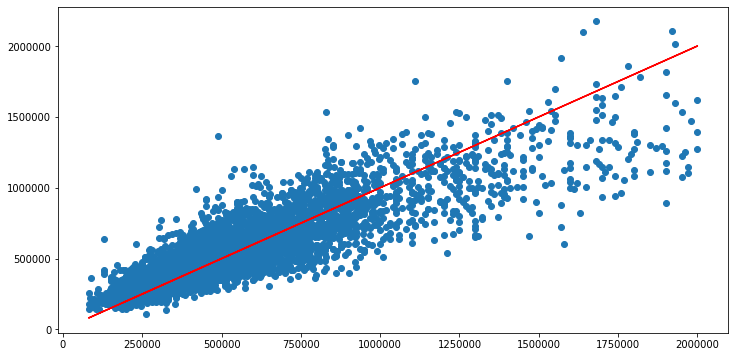

In [63]:
# Plotting the predictions against the true prices. We can see a strong correlation
plt.figure(figsize=(12,6))

plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

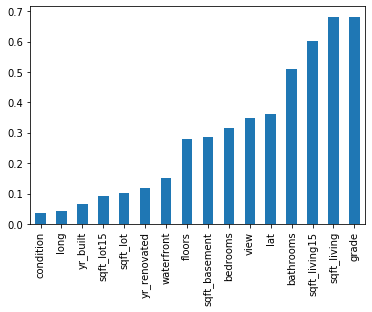

In [66]:
# Showing the strongest correlations with price. The grade of the house seems very important while
    # the condition does not
df.corr()['price'][1:].sort_values().plot(kind='bar')

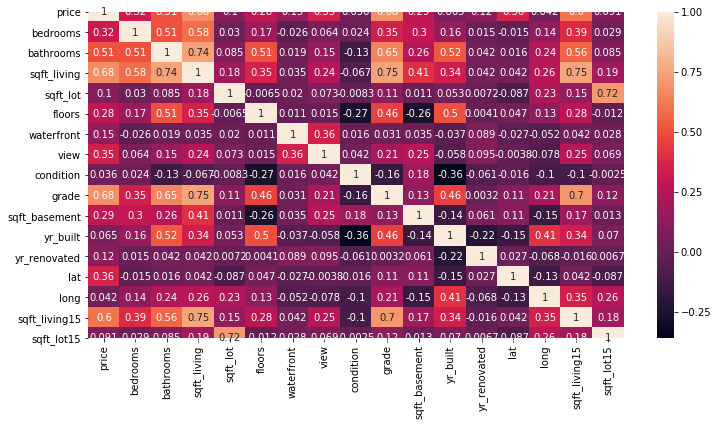

In [67]:
# finally a heatmap to see multicollinearity
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

I attempted to predict housing prices in a certain city in the US (Seattle) by using a Sequential Neural Network. The results showed a 75% of variance explained and a nice correlation between my predictions and the actual housing prices were shown in a plot. However, the model on average was wrong by a 100k dollars, which is quite a lot. I do not advise using this model for financial decisions